# **8 Queens Problem**

### **Problem Formulation**

<small style="font-size: 15px;">

**State Representation:** 

Each state is represented as a list where each index corresponds to a row on the chessboard, and the value at each index represents the column position of the queen in that row.

**Initial State:**

An empty board with no queens placed.

**Goal State:**  

Place queens on the board such that no two queens are in the same row, column, or diagonal.

**Actions:**  

The allowed actions involve,
- Place a queen in a valid column.

- Move to the next row recursively.

- Attempt to place another queen.

- Validate placement based on constraints.

- Backtrack if placement is invalid.

- Repeat until all rows are filled.

- Terminate when a solution is found or no possibilities remain.

**Transition Model:**  

Given a current state and an action, the transition model returns the resulting new state after applying that action.

**Solution Approach:**  

The 8 Queens Problem requires placing eight queens on a chessboard so that none of them attack each other. Since queens can move horizontally, vertically, and diagonally, the challenge lies in finding a configuration where all queens remain safe. This solution uses a backtracking algorithm, where queens are placed row by row, and each new placement is checked for safety against previous ones. The chessboard is visually represented as an 8×8 matrix, with alternating colors to resemble a checkered pattern. Queens are placed one at a time in valid positions, and the algorithm recursively moves to the next row until all rows are filled. If no valid placement exists, the algorithm backtracks, removing the last placed queen and trying a different column in the previous row. Safety checks ensure that no two queens share a column or diagonal before confirming a placement. Once a complete arrangement is found, the board is displayed with queen images overlaid. If no valid solution exists the program prints No solution found and terminates.

</small>

### **Implementation**

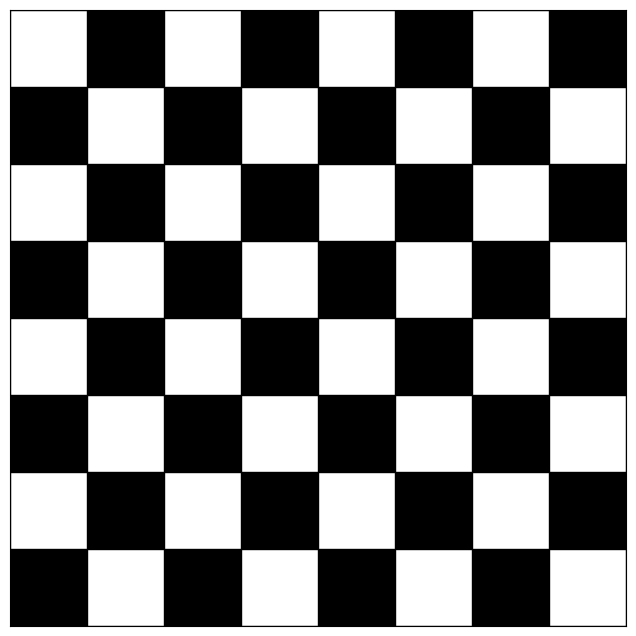

Board of size 8 is created.



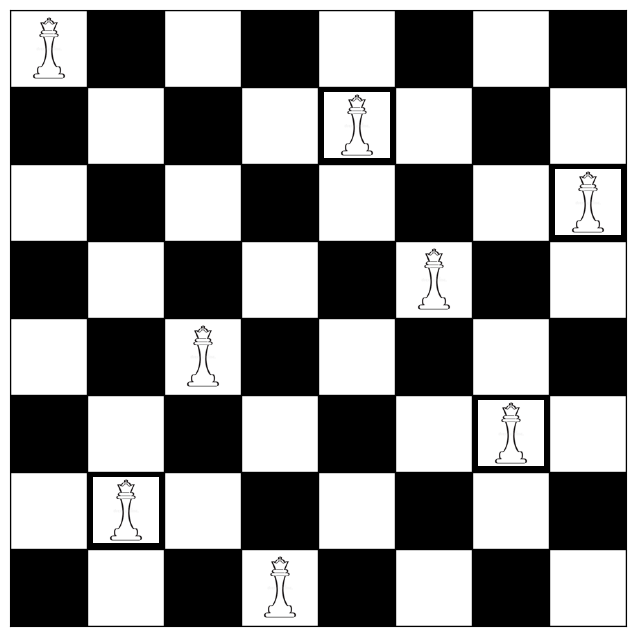

Solution for 8-Queens is found.


In [1]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
def display_board(board_matrix, size):
    fig, ax = plt.subplots(figsize=(size, size))
    ax.imshow(board_matrix, interpolation='nearest')
    ax.set_xticks(np.arange(-0.5, size, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, size, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.show()
def create_empty_board(size):
    board_matrix = np.zeros((size, size, 3))
    for i in range(size):
        for j in range(size):
            if (i + j) % 2 == 0:
                board_matrix[i, j] = [1, 1, 1] 
            else:
                board_matrix[i, j] = [0, 0, 0] 
    return board_matrix
def solve_n_queens(board, row, size, queen_positions):
    if row == size:
        return True 
    for col in range(size):
        if is_safe(board, row, col, size):
            board[row] = col
            queen_positions.append((row, col))
            if solve_n_queens(board, row + 1, size, queen_positions):
                return True
            queen_positions.pop()
    return False 
def is_safe(board, row, col, size):
    for i in range(row):
        if board[i] == col or abs(board[i] - col) == abs(i - row):
            return False
    return True
def display_board_with_queens(board_matrix, size, queen_positions, queen_image_path):
    fig, ax = plt.subplots(figsize=(size, size))
    ax.imshow(board_matrix, interpolation='nearest')
    ax.set_xticks(np.arange(-0.5, size, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, size, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    queen_image = Image.open(queen_image_path).convert("RGB")
    queen_image.thumbnail((95, 95))
    for row, col in queen_positions:
        imagebox = OffsetImage(queen_image, zoom=0.5)
        ab = AnnotationBbox(imagebox, (col, row), frameon=False, box_alignment=(0.5, 0.5))
        ax.add_artist(ab)
    plt.show()
size = 8
board_matrix = create_empty_board(size)
display_board(board_matrix, size)
print(f"Board of size {size} is created.\n")
queen_positions = []
board = [-1] * size 
if solve_n_queens(board, 0, size, queen_positions):
    display_board_with_queens(board_matrix, size, queen_positions, "queen.png")
    print(f"Solution for {size}-Queens is found.")
else:
    print("No solution exists.")